In [438]:
# Import useful libraries
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import scipy.stats

Suppose that each millisecond, Machine A either sends a packet to Machine B with probability $p$ or not. Assume that transmissions at different times occur independently. Let $S_n$ be the number of packets sent from Machine A to Machine B in $n$ milliseconds. Assume $S_0=0$. It turns out that $S_n$ is a sum process. The function below simulates the transmission system for multiple trials and returns $S_n$. In the returned array, each column corresponds to one trial of the sum process and each row corresponds to one millisecond.  

In [439]:
def sum_process(ntrial, ntime, p):
    '''Generate ntrails sum processes that last for ntime millisecond'''
    X = scipy.stats.bernoulli.rvs(p,size=[ntime+1,ntrial])
    X[0] = np.zeros(ntrial)
    S_n = np.cumsum(X,axis=0)
    return S_n

In the following, we generate and plot 5 sum processes over 100 milliseconds. The probability of transmission in each millisecond is $p = 0.2$.

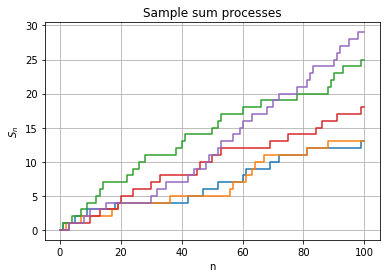

In [440]:
# generate 5 sum processes 
ntrail = 5
ntime = 100
p = 0.2
sample_Sn = sum_process(ntrail, ntime, p)

# plot of sum processes
n = range(0,ntime+1)
plt.step(n, sample_Sn, where='post')
plt.xlabel('n')
plt.ylabel('$S_n$')
plt.title('Sample sum processes')
plt.grid()
plt.show()


In the following, we generate many sum processes.  We pick out the sum processes at time $n1=10$ and plot the empirical histogram of $S_{n1}$ over all trials.

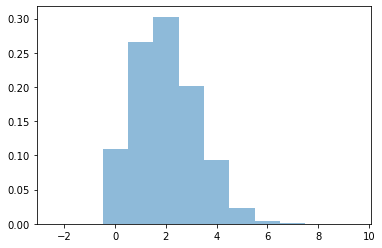

In [441]:
# generate 4000 sum processes
ntrial = 4000
ntime = 1000
p = 0.2
S_n = sum_process(ntrial,ntime,p)

# pick out the sum processes at a particular time n1=10
n1 = 10
samples1 = S_n[n1]
edges = np.arange(-2.5,10.5,1)
fig, ax = plt.subplots()
ax.hist(samples1,bins=edges,density=True,alpha=0.5)
plt.show()

**Part a:** Since $S_n$ is obtained by taking the sum of all the packets from time 0 up to time $n$, $S_n$ is given by a binomial random variable with parameters $n$ and $p=0.2$. By the central limit theorem, for large $n$, the distribution of $S_n$ is approximately Gaussian.

(1) Compute the theoretical mean (tmean) and standard deviation (tstd) of $S_n$ at time n1 = 10. 

(2) Compute the empirical mean (emean) and standard deviation (estd) of $S_n$ at time n1 = 10. 

(3) Plot the theoretical (binomial) and the approximating (Gaussian) distributions with the empirical histogram in the same figure from -2 to 10. 

1.99475,1.2769974304985896
2.0,1.2649110640673518


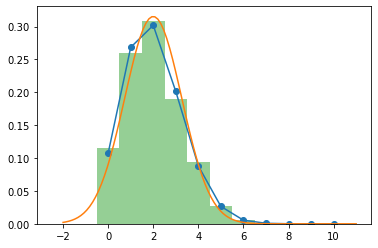

In [442]:
# put your code here
ntrial = 4000
ntime = 1000
p = 0.2
S_n = sum_process(ntrial,ntime,p)

# pick out the sum processes at a particular time n1=10
n1 = 10

samples1 = S_n[n1]
emean = samples1.mean()
estd = samples1.std()
print(f'{emean},{estd}')


x = np.linspace(-2,10+1,100)
x1=np.arange(0,10+1)

edges = np.arange(-2.5,10.5,1)

tmean = scipy.stats.binom.mean(n1,p)
tstd = scipy.stats.binom.std(n1,p)
print(f'{tmean},{tstd}')

y1=scipy.stats.binom.pmf(x1,n1,p)
y2=scipy.stats.norm.pdf(x, loc = tmean, scale = tstd)

fig, ax = plt.subplots()
ax.plot(x1, y1, '-o', label = "binomial pmf")
ax.plot(x, y2, label = 'Gaussian distribution')
ax.hist(samples1,bins=edges,density=True,alpha=0.5)
plt.show()

**Part b:** Let $E$ be the event that $S_n$ is greater than 1 but less than 3, i.e., $1 < S_n \leq 3$, for $n1=10$.

(1) Compute the theoretical probability of $E$.

(2) Compute approximate probability of $E$ based on the central limit thorem.

(3) Compute the relative frequency of $E$.

(4) Compute the percentage difference between the approximate and theoretical probabilities, i.e. the absolute difference divided by the theoretical probability times 100.

In [443]:
# put your code here

E_tp=np.sum(y1[1+1:4])
print(E_tp)
E_ap=scipy.stats.norm.sf(1,loc=tmean,scale=tstd)-scipy.stats.norm.sf(3,loc=tmean,scale=tstd)
print(E_ap)
cnt=0
for i in range(0,ntrial):
    if(samples1[i]>1 and samples1[i]<=3):
        E=samples1[i]
        cnt+=1
E_rf=cnt/ntrial
print(E_rf)


if(E_tp>E_ap):
    pd=E_tp-E_ap
else:
    pd=E_ap-E_tp
    
pd=(pd*100)
print(pd)

0.5033164800000002
0.5708046995596507
0.4985
6.748821955965056


**Part c:** In a random process, the mean and standard deviation (or variance) can change over time.

(1) Compute the theoretical mean (tmean) and standard deviation (tstd) of $S_n$ at time n2 = 1000. 

(2) Compute the empirical mean (emean) and standard deviation (estd) of $S_n$ at time n2 = 1000. 

(3) Plot the theoretical (binomial) and the approximating (Gaussian) distributions with the empirical histogram in the same figure from 0 to 400. 

1.99475,1.2769974304985896
200.0,12.649110640673518


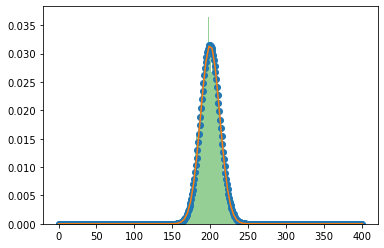

In [444]:
ntrial = 4000
ntime = 1000
p = 0.2
S_n = sum_process(ntrial,ntime,p)

# pick out the sum processes at a particular time n1=10
n2 = 1000

samples2 = S_n[n2]
emean = samples1.mean()
estd = samples1.std()
print(f'{emean},{estd}')


x3 = np.linspace(0,400+1,100)
x2=np.arange(0,400+1)

edges = np.arange(-0.5,400.5,1)

tmean = scipy.stats.binom.mean(n2,p)
tstd = scipy.stats.binom.std(n2,p)
print(f'{tmean},{tstd}')

y3=scipy.stats.binom.pmf(x2,n2,p)
y4=scipy.stats.norm.pdf(x3, loc = tmean, scale = tstd)

fig, ax = plt.subplots()
ax.plot(x2, y3, '-o', label = "binomial pmf")
ax.plot(x3, y4, label = 'Gaussian distribution')
ax.hist(samples2,bins=edges,density=True,alpha=0.5)
plt.show()

**Part d:** Let $F$ be the event that $S_n$ is greater than 190 and less than 210, i.e., $190 < S_n \leq 210$, for $n2=1000$. Note that this event is similar to that in studied in **Part b**, because the mean in **Part b** was 2 and the limits were set to be 1 below and 1 above the mean.  Here the mean is 200, and we set the limits to be 10 below and 10 above, because the standard deviation of $S_{1000}$ is 10 times the standard deviation of $S_{10}$.

(1) Compute the theoretical probability of $F$.

(2) Compute approximate probability of $F$ based on the central limit thorem.

(3) Compute the relative frequency of $F$.

(4) Compute the percentage difference between the approximate and theoretical probabilities, i.e. the absolute difference divided by the theoretical probability times 100.

(5) Compare your results with **Part b**

In [445]:
# put your code here

F_tp=np.sum(y3[190+1:210+1])
print(F_tp)
F_ap=scipy.stats.norm.sf(190,loc=tmean,scale=tstd)-scipy.stats.norm.sf(210,loc=tmean,scale=tstd)
print(F_ap)
cnt=0
for i in range(0,ntrial):
    if(samples2[i]>1 and samples1[i]<3):
        F=samples1[i]
        cnt+=1
F_rf=cnt/ntrial
print(F_rf)


if(F_tp>F_ap):
    pd1=F_tp-F_ap
else:
    pd1=F_ap-F_tp
    
pd1=(pd1*100)
print(pd1)

0.5701015757269107
0.5708046995596507
0.6835
0.07031238327400713


**Part d answer:** Since the value of n2 is greater than n1, the percentage difference in Part d is much smaller  than in part b.

**Part e:** Is $S_n$ a wide-sense stationary process? Justify your answer.

**Part e answer:** No, the mean is not constant.

**Part f:** The correlation between values of the random process at different points in time differs according to the time samples chosen. Intuitively, samples that are closer in time should be more correlated than samples that are more separated in time. Visualize this by plotting two plots:
* A 2D scatter plot of the values of the sum process at time 100 and 105
* A 2D scatter plot of the values of the sum process at time 100 and 150

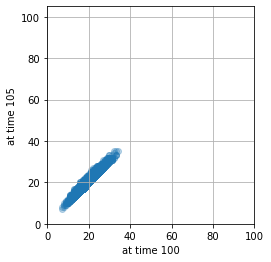

In [446]:
# put your code here
ntrial = 4000
ntime = 1000
p = 0.2
S_n = sum_process(ntrial,ntime,p)

# pick out the sum processes at a particular time n1=10
n3 = 100
n4 = 105
samples3 = S_n[n3]
samples4 = S_n[n4]
fig, ax = plt.subplots()

# create scatter plot
ax.scatter(samples3, samples4, alpha=0.3)

# set axes and labels
ax.axis('scaled')
axlim = [0, 100, 0, 105]
ax.axis(axlim)
plt.xlabel('at time 100')
plt.ylabel('at time 105')
plt.grid(True)


plt.show()

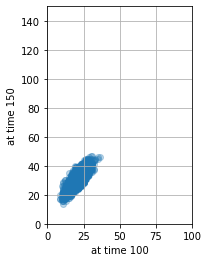

In [447]:
# put your code here
ntrial = 4000
ntime = 1000
p = 0.2
S_n = sum_process(ntrial,ntime,p)

# pick out the sum processes at a particular time n1=10
n5 = 100
n6 = 150
samples5 = S_n[n5]
samples6 = S_n[n6]
fig, ax = plt.subplots()

# create scatter plot
ax.scatter(samples5, samples6, alpha=0.3)

# set axes and labels
ax.axis('scaled')
axlim = [0, 100, 0, 150]
ax.axis(axlim)
plt.xlabel('at time 100')
plt.ylabel('at time 150')
plt.grid(True)


plt.show()

**Part g** Compute the theoretical value of the correlation coefficient between $S_n[100] and S_n[105], as well the correlation coefficient between S_n[100] and S_n[150]. Compare this with the empirical estimate from the data.

In [448]:
# put your code here
rho1, rho2 = scipy.stats.pearsonr(samples3,samples4)
print(rho1)
print(rho2)
rho3, rho4=scipy.stats.pearsonr(samples5,samples6)
print(rho3)
print(rho4)

0.9754480508606962
0.0
0.8069541287110151
0.0


**Part h:** Compare the correlation coefficients calculated for times (100,105) and times (100,150). How are the differences in the correlation coefficients reflected in the differences in the scatter plots?

**Part h answer:**  the correlation coefficient for times(100,105) is greater than for times(100,150).

In [449]:
df1=rho1-rho3
print(df)
df2=rho2-rho4
print(df2)
print(rho1)
print(rho3)

0.1633321734197044
0.0
0.9754480508606962
0.8069541287110151
